# ASIATIC OPTION PRICING


In [62]:
import numpy as np
import matplotlib.pyplot as plt



## DEFINE PARAMETERS

In [ ]:
# PARAMETERS
np.random.seed(42) # the number of life :)
M = 1000           # number of simulation by the M.C method
T = 1              # maturity
K = 95          # strike of the option
S0 = 120         # initial price
r = 0.05           # rate
sigma = 0.2        # volatility
n = 100000         # number of values to get to compute the mean of S
dt = T / n         # time step for edp resolution







## RANDOM WALKING : PRICE SIMULATION

## SIMULATION

In [64]:
S = np.zeros((M, n+1))  
S[:, 0] = S0            
Z = np.random.normal(0, 1, (M, n))  

for i in range(1, n+1):
    S[:, i] = S[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, i-1])




## PLOT 

Text(0, 0.5, 'Price of S')

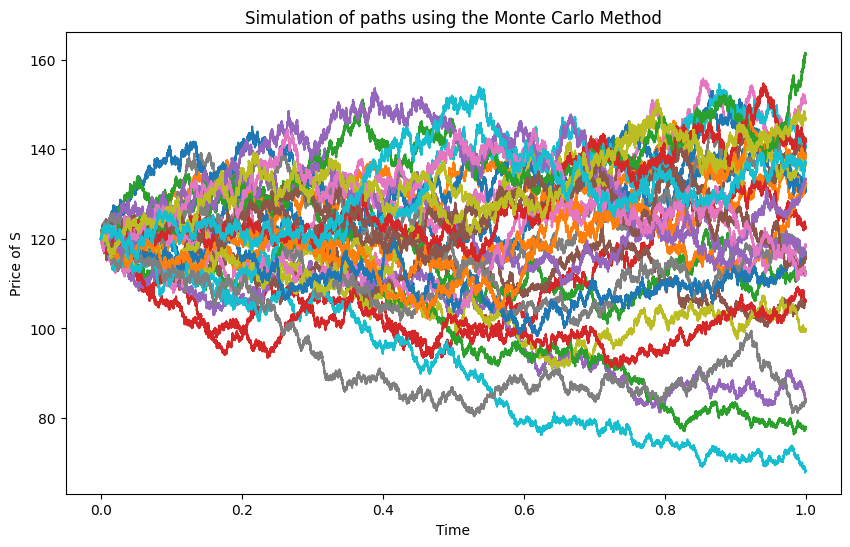

In [65]:
time = np.linspace(0,T,n+1)
plt.figure(figsize=(10, 6))
to_plot = 30
for i in range(to_plot):
    plt.plot(time,S[i,:])
plt.title("Simulation of paths using the Monte Carlo Method")
plt.xlabel("Time")
plt.ylabel("Price of S")

## PAYOFFS FUNCTIONS

In [66]:
def payOffCallAsiatic(Sbar,K):
    return np.maximum(Sbar - K,0)

def payOffPutAsiatic(Sbar,K):
    return np.maximum(K - Sbar,0)


    

## COMPUTE PRICE OF THE OPTION

In [67]:
allPayOff = np.zeros(M)

for i in range(0,M):
    
    allPayOff[i] = payOffCallAsiatic(np.mean(S[i,:]),K)

C = np.exp(r*T) * (1.0/M) * (np.sum(allPayOff))

print(C)

4.520429076330904
